In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.linear_model import ElasticNet, Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, ConfusionMatrixDisplay,roc_auc_score,roc_curve
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error,auc
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_fscore_support, precision_score, f1_score
from sklearn.pipeline import Pipeline, make_pipeline

In [2]:
#Грузим датасет

df= pd.read_csv('income_train.csv')

display(df.head(2))


display(df.isna().sum())

#Перекодируем строковые значения
le = LabelEncoder()

display(df.columns)


df["workclass"] = le.fit_transform(df["workclass"])
df["education"] = le.fit_transform(df["education"])
df["marital-status"] = le.fit_transform(df["marital-status"])
df["occupation"] = le.fit_transform(df["occupation"])
df["relationship"] = le.fit_transform(df["relationship"])
df["race"] = le.fit_transform(df["race"])
df["sex"] = le.fit_transform(df["sex"])
df["native-country"] = le.fit_transform(df["native-country"])
df["income"]=le.fit_transform(df["income"])


df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,37,Self-emp-not-inc,112497,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
1,39,Private,278557,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1628,48,United-States,<=50K


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,37,6,112497,12,14,2,4,0,4,1,0,0,50,39,1
1,39,4,278557,8,11,2,3,0,4,1,0,1628,48,39,0
2,33,4,173858,9,13,2,1,2,1,1,0,0,40,19,0


In [3]:
#Выделяем X y
X = df.drop('income',axis=1)
y = df['income']


#сплитуем данные

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)

#зададим модели из которых выберем лучшую

dtc = DecisionTreeClassifier()
reg = LogisticRegression()
knn = KNeighborsClassifier()
gbc = GradientBoostingClassifier()
svc = SVC()



In [4]:
#выберем лучшую модель из списка

for i in [gbc, dtc, reg, knn, svc]:
    i.fit(X_train, y_train)
    pred = i.predict(X_test)
    test_score = f1_score(y_test, pred)
    train_score = f1_score(y_train, i.predict(X_train))
    if abs(train_score - test_score) <= 0.01:
        print(i)
        print("score for train df", f1_score(y_train, i.predict(X_train)))
        print("score for test df", f1_score(y_test, pred))
        print(classification_report(y_test, pred))
        print(confusion_matrix(y_test, pred))

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
score for train df 0.6898603799496452
score for test df 0.6896247240618102
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      3911
           1       0.81      0.60      0.69      1299

    accuracy                           0.87      5210
   macro a

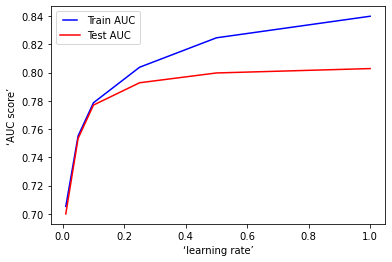

In [5]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]

train_results = []
test_results = []
for eta in learning_rates:
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label= 'Train AUC')
line2, = plt.plot(learning_rates, test_results, "r", label= "Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel("‘AUC score’")
plt.xlabel("‘learning rate’")
plt.show()

#оптимально 0.1

No handles with labels found to put in legend.


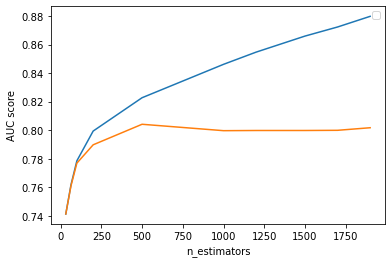

In [6]:
n_estimators = [32, 64, 100, 200, 500, 1000, 1200, 1500, 1700, 1900]
train_results = []
test_results = []
for estimator in n_estimators:
   model = GradientBoostingClassifier(n_estimators=estimator)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results)
line2, = plt.plot(n_estimators, test_results)
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

#оптимально 500, дальше есть риск переобучения

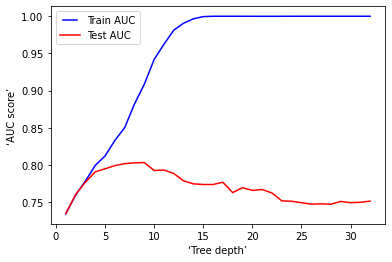

In [7]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   model = GradientBoostingClassifier(max_depth=max_depth)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label="Train AUC")
line2, = plt.plot(max_depths, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("‘AUC score’")
plt.xlabel("‘Tree depth’")
plt.show()

#оптимально 5

In [8]:
#тюнингуем полученную модель

kfold = KFold(n_splits =10, shuffle = True)
n_estimators=[200, 500, 510]
learning_rate=[0.01, 0.1]
max_depth=[2,3,5]
params={'n_estimators':n_estimators,'learning_rate':learning_rate,'max_depth':max_depth}

grid_gbc=GridSearchCV(gbc,param_grid=params, cv = kfold, scoring = "f1", n_jobs=-1 )

grid_gbc.fit(X_train,y_train)

print(grid_gbc.best_estimator_)
print(grid_gbc.best_params_)

pred_1 = grid_gbc.predict(X_test)


print("F1_score train of GradientBoostingClassifier model = {} %".format(round(metrics.f1_score(y_train,grid_gbc.predict(X_train))*100,2)))
print("F1_score test of GradientBoostingClassifier model = {} %".format(round(metrics.f1_score(y_test,pred_1)*100,2)))


print(classification_report(y_test, pred_1))
print(confusion_matrix(y_test, pred_1))

#модель улучшилась 

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
F1_score train of GradientBoostingClassifier model = 77.53 %
F1_score test of GradientBoostingClassifier model = 73.14 %
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      3911
           1 

GradientBoostingClassifier: ROC AUC=0.929


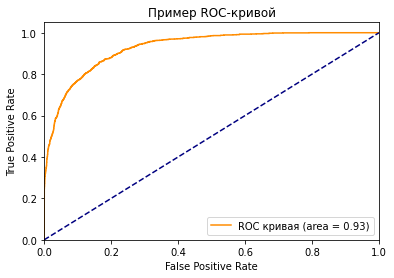

In [9]:
lr_probs = grid_gbc.predict_proba(X_test)

# сохраняем вероятности только для положительного исхода
lr_probs = lr_probs[:, 1]

# рассчитываем ROC AUC
lr_auc = roc_auc_score(y_test, lr_probs)
print('GradientBoostingClassifier: ROC AUC=%.3f' % (lr_auc))

# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y_test, lr_probs)
roc_auc = auc(fpr, tpr)

# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

In [11]:
pipeline_final = make_pipeline(GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False))

pipeline_final.fit(X, y)

df_test = pd.read_csv("income_test.csv")


df_test["workclass"] = le.fit_transform(df_test["workclass"])
df_test["education"] = le.fit_transform(df_test["education"])
df_test["marital-status"] = le.fit_transform(df_test["marital-status"])
df_test["occupation"] = le.fit_transform(df_test["occupation"])
df_test["relationship"] = le.fit_transform(df_test["relationship"])
df_test["race"] = le.fit_transform(df_test["race"])
df_test["sex"] = le.fit_transform(df_test["sex"])
df_test["native-country"] = le.fit_transform(df_test["native-country"])



y_predict = pipeline_final.predict(df_test)


print('Правильность на тестовом наборе: {:.3f}'.format(pipeline_final.score(X_test, y_test)))

Правильность на тестовом наборе: 0.900
